In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [129]:
import warnings
warnings.filterwarnings("ignore")

In [130]:
#Dataset Import

data = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")

In [131]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Data Cleaning

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [133]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [134]:
data.shape

(7787, 12)

The missing values in the director, cast, and country attributes can be replaced with 'Unknown'.

10 records with missing values in the date_added column can be dropped.

The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [135]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True) 
data['country'].fillna('Unknown', inplace=True) 

data['rating'].fillna(data['rating'].mode()[0], inplace=True)  
data.dropna(axis=0, subset=['date_added'], inplace=True)


In [136]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [137]:
data.duplicated().sum()

np.int64(0)

In [138]:
#displays number of unique values in each column
data.nunique()

show_id         7777
type               2
title           7777
director        4050
cast            6822
country          682
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [139]:
#considering the first genre and country for analysis
data['genre'] = data['listed_in'].apply(lambda x: x.split(',')[0])
data['country'] = data['country'].apply(lambda x: x.split(',')[0])

In [140]:
#drop listed_in
data.drop(columns=['listed_in'], inplace=True)

In [141]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,International TV Shows
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...",Action & Adventure


In [142]:
#taking only the integer val of duration
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]))
                                          

In [143]:
data['duration'].dtype

dtype('int64')

In [144]:
data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

In [145]:
# Movie length in minutes
print(data[data['type']=='Movie'].duration.unique())
# TV Show length in seasons
print(data[data['type']=='TV Show'].duration.unique())

[ 93  78  80 123  95 119 118 143 103  89  91 149 144 124  87 110 128 117
 100  84  99  90 102 104 105  56 125  81  97 106 107 109  44  75 101  37
 113 114 130  94 140 135  82  70 121  92 164  53  83 116  86 120  96 126
 129  77 137 148  28 122 176  85  22  68 111  29 142 168  21  59  20  98
 108  76  26 156  30  57 150 133 115 154 127 146 136  88 131  24 112  74
  63  38  25 174  60 153 158 151 162  54  51  69  64 147  42  79  40  45
 172  10 163  55  72  61  71 160 171  48 139 157  15  65 134 161  62 186
  49  73  58 165 166 138 159 141 132  52  67  34  66 312 180  47 155  14
 177  11   9  46 145   8  12  43  50  23 185 200 169  27 170 196  33 181
 204  32  35 167 179 193  13 214  17 173 192 209 187  41 182 224 233 189
 152  19 208 237  31 178 230 194 228 195   3  16   5  18 205 190  36 201
 253 203 191]
[ 4  1  2  3  5  9  8  6 11  7 13 12 10 16 15]


In [146]:
data['month_added'] = data['date_added'].apply(lambda x: x.split(',')[0])
data['year_added'] = data['date_added'].apply(lambda x: x.split(',')[1].strip())


In [147]:
data['year_added'].head(286)

0      2020
1      2016
2      2018
3      2017
4      2020
       ... 
282    2019
283    2018
284    2017
285    2016
286    2019
Name: year_added, Length: 286, dtype: object

In [148]:
#typecasting date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y',errors='coerce')

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   int64         
 10  description   7777 non-null   object        
 11  genre         7777 non-null   object        
 12  month_added   7777 non-null   object        
 13  year_added    7777 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 911.4+ KB


In [150]:
data['date_added'].head(286)

0     2020-08-14
1     2016-12-23
2     2018-12-20
3     2017-11-16
4     2020-01-01
         ...    
282   2019-01-15
283   2018-05-01
284          NaT
285   2016-02-18
286   2019-02-01
Name: date_added, Length: 286, dtype: datetime64[ns]

<Axes: xlabel='rating', ylabel='count'>

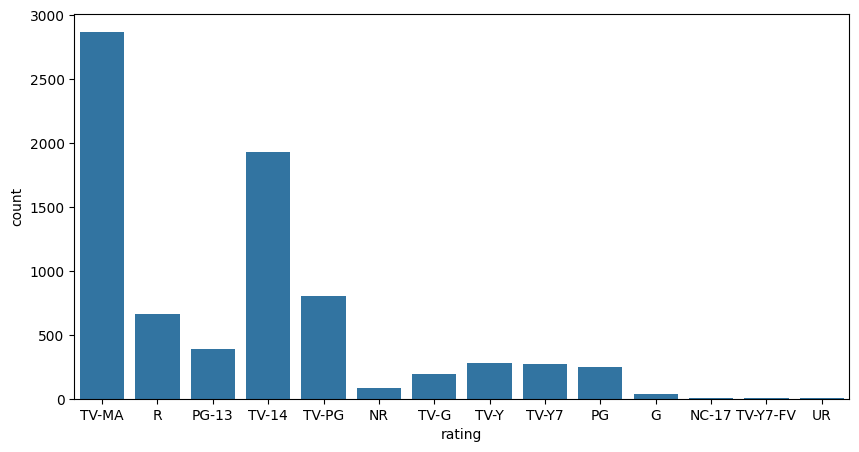

In [151]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=data)

So, max shows are rated TV-MA and TV-14 and TV-PG

In [152]:
#tagging all the ratings for different age groups

rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data['age_group'] = data['rating'].map(rating_map)
data['age_group'].value_counts()

age_group
Adults          3624
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: count, dtype: int64